In [9]:
!pip install pycryptodome --user


In [10]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64
import hashlib

def pad(text):
    pad_len = 16 - len(text) % 16
    return text + chr(pad_len) * pad_len

def unpad(text):
    return text[:-ord(text[-1])]

def get_key(password):
    return hashlib.sha256(password.encode()).digest()

def encrypt_text(plain_text, password):
    key = get_key(password)
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(plain_text).encode())
    return base64.b64encode(cipher.iv + ct_bytes).decode('utf-8')

def decrypt_text(cipher_text, password):
    key = get_key(password)
    data = base64.b64decode(cipher_text)
    iv = data[:16]
    ct = data[16:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct).decode('utf-8'))


In [11]:
from PIL import Image
import random

def create_image(path='input_image.png', width=300, height=300, pattern='solid', color=(255, 255, 255)):
    img = Image.new('RGB', (width, height))
    pixels = img.load()

    for x in range(width):
        for y in range(height):
            if pattern == 'solid':
                pixels[x, y] = color
            elif pattern == 'random':
                pixels[x, y] = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            elif pattern == 'gradient':
                r = int((x / width) * 255)
                g = int((y / height) * 255)
                b = 128
                pixels[x, y] = (r, g, b)

    img.save(path)
    return path


In [12]:
EOF_MARKER = '1111111111111110'

def text_to_binary(text):
    return ''.join(format(ord(c), '08b') for c in text)

def binary_to_text(binary):
    chars = [binary[i:i+8] for i in range(0, len(binary), 8)]
    return ''.join(chr(int(char, 2)) for char in chars)

def hide_text(image_path, text, output_path='stego_image.png'):
    binary_data = text_to_binary(text) + EOF_MARKER
    img = Image.open(image_path)
    if img.mode != 'RGB':
        img = img.convert('RGB')

    pixels = list(img.getdata())
    if len(pixels) * 3 < len(binary_data):
        raise ValueError("Image is too small.")

    new_pixels = []
    idx = 0

    for pixel in pixels:
        r, g, b = pixel
        if idx < len(binary_data):
            r = (r & ~1) | int(binary_data[idx])
            idx += 1
        if idx < len(binary_data):
            g = (g & ~1) | int(binary_data[idx])
            idx += 1
        if idx < len(binary_data):
            b = (b & ~1) | int(binary_data[idx])
            idx += 1
        new_pixels.append((r, g, b))

    img.putdata(new_pixels)
    img.save(output_path)
    return output_path

def extract_text(image_path):
    img = Image.open(image_path)
    pixels = list(img.getdata())

    binary_data = ''
    for pixel in pixels:
        for val in pixel[:3]:
            binary_data += str(val & 1)

    eof = binary_data.find(EOF_MARKER)
    if eof == -1:
        raise ValueError("No hidden message found.")
    
    binary_data = binary_data[:eof]
    return binary_to_text(binary_data)


In [13]:
# Create a new patterned image
img_path = create_image(path='my_image.png', width=300, height=300, pattern='gradient')

# Define your secret message and password
secret_msg = "This is a top secret message."
password = "mypassword"

# Encrypt the message
encrypted = encrypt_text(secret_msg, password)
print("Encrypted Text:", encrypted)

# Hide the encrypted message in the image
stego_img = hide_text('my_image.png', encrypted)
print("Message hidden in:", stego_img)

# Later, extract and decrypt the message
hidden_encrypted = extract_text(stego_img)
print("Extracted Encrypted:", hidden_encrypted)

# Decrypt
decrypted = decrypt_text(hidden_encrypted, password)
print("Decrypted Message:", decrypted)


Encrypted Text: fwRvB9mh4VkK8iYZ63d4Yz8Ei38KYFjA6Jl5viucodAtRJR6gHz5GzaUjAfsMGnV
Message hidden in: stego_image.png
Extracted Encrypted: fwRvB9mh4VkK8iYZ63d4Yz8Ei38KYFjA6Jl5viucodAtRJR6gHz5GzaUjAfsMGnV
Decrypted Message: This is a top secret message.


In [14]:
pip install pillow pycryptodome


Note: you may need to restart the kernel to use updated packages.


In [15]:
from PIL import Image
import matplotlib.pyplot as plt

def show_image(path):
    img = Image.open(path)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


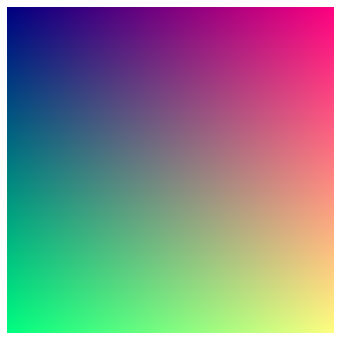

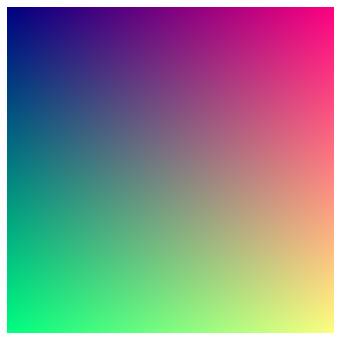

In [16]:
# After generating the image
img_path = create_image(path='my_image.png', width=300, height=300, pattern='gradient')
show_image(img_path)

# After hiding the message
stego_img = hide_text(img_path, encrypted)
show_image(stego_img)
